In [8]:
import pandas as pd
data = pd.read_csv('bbc_cleaned.csv')
data

,text,topic
0,dallaglio man end controversy lawrence dallagl...,sport
1,best person legal job best person job appoint ...,politics
2,viewers able shape tv imagine edit titanic wat...,tech
3,fox attack blairs tory lie tony blair lie take...,politics
4,microsoft debut security tool microsoft releas...,tech
...,...,...
2113,rapper 50 cent end protege feud rapper 50 cent...,entertainment
2114,michael film signal retirement singer george m...,entertainment
2115,ray charles studio museum museum dedicate care...,entertainment
2116,chancellor rally labour voters gordon brown is...,politics


In [9]:
from sklearn.model_selection import train_test_split

texts = data['text']  # Extract the 'text' column
labels = data['topic']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1694, 424, 1694, 424)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features to 5000
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf.transform(X_test)  # Transform the testing data
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(1694, 5000)
(424, 5000)


Logistic Regression

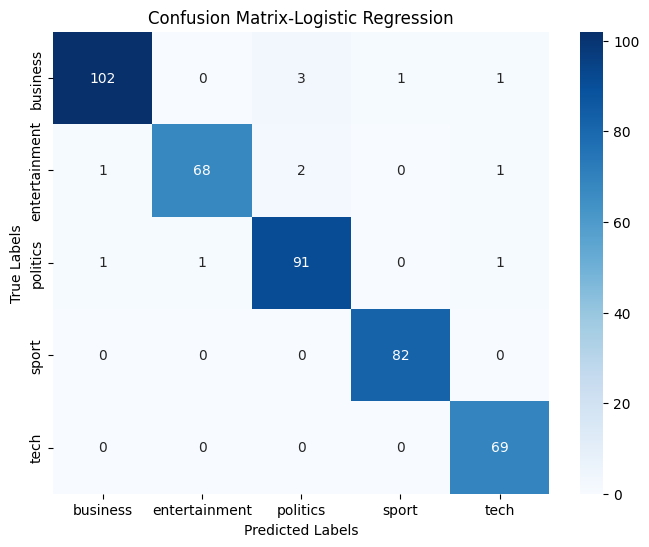

Logistic Regression Classifier:
                precision    recall  f1-score   support

     business       0.98      0.95      0.97       107
entertainment       0.99      0.94      0.96        72
     politics       0.95      0.97      0.96        94
        sport       0.99      1.00      0.99        82
         tech       0.96      1.00      0.98        69

     accuracy                           0.97       424
    macro avg       0.97      0.97      0.97       424
 weighted avg       0.97      0.97      0.97       424



In [11]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)
# Bước 2: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_tfidf)

# Bước 3: Đánh giá kết quả
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-Logistic Regression')
plt.show()

# In báo cáo phân loại
print("Logistic Regression Classifier:\n",classification_report(y_test, y_pred))



Random Forest

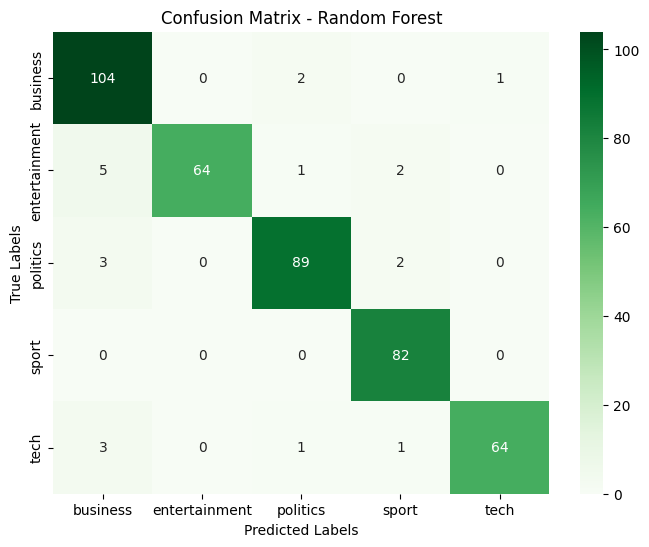

Random Forest Classifier:
                precision    recall  f1-score   support

     business       0.90      0.97      0.94       107
entertainment       1.00      0.89      0.94        72
     politics       0.96      0.95      0.95        94
        sport       0.94      1.00      0.97        82
         tech       0.98      0.93      0.96        69

     accuracy                           0.95       424
    macro avg       0.96      0.95      0.95       424
 weighted avg       0.95      0.95      0.95       424



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Huấn luyện Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_clf.predict(X_test_tfidf)

# Ma trận nhầm lẫn
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Vẽ ma trận nhầm lẫn cho Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# In báo cáo phân loại
print("Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))


Naive Bayes

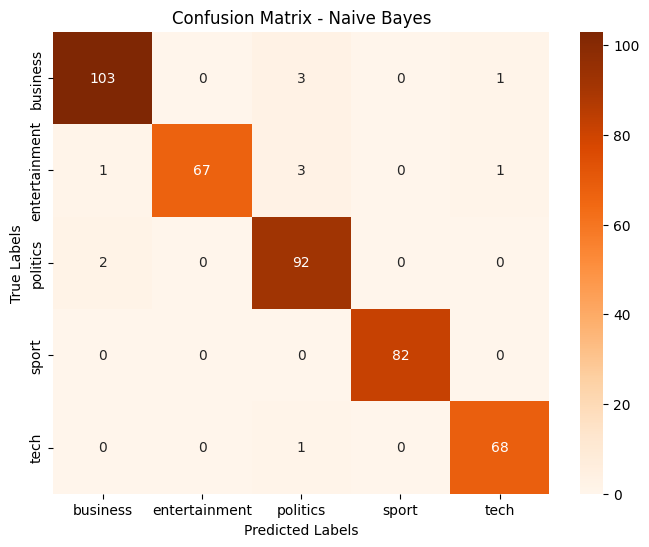

Naive Bayes Classifier:
                precision    recall  f1-score   support

     business       0.97      0.96      0.97       107
entertainment       1.00      0.93      0.96        72
     politics       0.93      0.98      0.95        94
        sport       1.00      1.00      1.00        82
         tech       0.97      0.99      0.98        69

     accuracy                           0.97       424
    macro avg       0.97      0.97      0.97       424
 weighted avg       0.97      0.97      0.97       424



In [13]:
from sklearn.naive_bayes import MultinomialNB

# Huấn luyện Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_nb = nb_clf.predict(X_test_tfidf)

# Ma trận nhầm lẫn
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Vẽ ma trận nhầm lẫn cho Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=nb_clf.classes_, yticklabels=nb_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# In báo cáo phân loại
print("Naive Bayes Classifier:\n", classification_report(y_test, y_pred_nb))


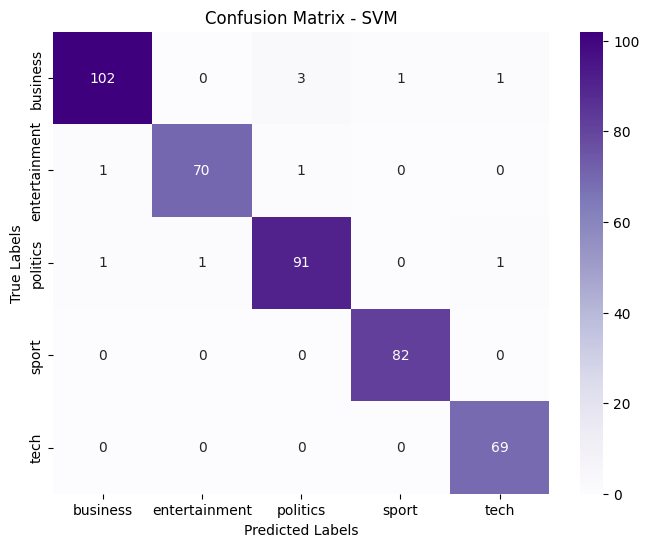

SVM Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.95      0.97       107
entertainment       0.99      0.97      0.98        72
     politics       0.96      0.97      0.96        94
        sport       0.99      1.00      0.99        82
         tech       0.97      1.00      0.99        69

     accuracy                           0.98       424
    macro avg       0.98      0.98      0.98       424
 weighted avg       0.98      0.98      0.98       424



In [14]:
from sklearn.svm import SVC

# Huấn luyện mô hình SVM
svm_clf = SVC(kernel='linear', random_state=42)  # Sử dụng kernel 'linear' cho dữ liệu văn bản
svm_clf.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_clf.predict(X_test_tfidf)

# Tạo ma trận nhầm lẫn
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# In báo cáo phân loại
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


RESULT

Logistic Regression:
Accuracy: 98%
Key Metrics: This model performs very well, with high accuracy and strong F1 scores across all classes.
Best Results: The entertainment class has a recall of 1.00, and other classes also have high recall (close to 1.00).
Classification Ability: The model performs excellently in classifying topics such as business, sport, and tech with high accuracy and F1 scores.

Random Forest:
Accuracy: 96%
Key Metrics: The Random Forest model shows relatively high accuracy, though slightly lower than Logistic Regression. The sport and entertainment classes maintain very good recall and F1 scores.
Best Results: The sport and entertainment classes have a recall of 1.00, indicating the model's strong performance in these topics.
Classification Ability: Random Forest performs well in classifying most classes, with stable precision and recall metrics, although slightly lower than Logistic Regression.

Naive Bayes:
Accuracy: 98%
Key Metrics: Naive Bayes achieves accuracy equivalent to Logistic Regression. It has high recall and precision, particularly for the sport class with a recall of 1.00.
Best Results: Like Logistic Regression, Naive Bayes performs excellently in the sport class, with both recall and F1 at 1.00.
Classification Ability: Naive Bayes has very high accuracy in classifying entertainment and sport, and also performs well for other classes like business and tech.

SVM Classification Results:
Accuracy: 98%
Key Metrics: The SVM model demonstrates excellent performance, achieving an overall accuracy comparable to Logistic Regression and Naive Bayes. Its precision, recall, and F1-scores across all classes are consistently high.
Best Results:
The entertainment and sport classes have perfect recall (1.00), highlighting the model's exceptional ability to classify these topics without any false negatives.
The tech class also achieves outstanding performance with a recall of 0.99 and an F1-score of 0.98.
Classification Ability:
SVM excels in classifying topics like entertainment, sport, and tech with near-perfect precision and recall. While the politics class shows slightly lower recall (0.95), it is still within a high-performance range. Overall, the model provides robust and reliable classification across all topics.